In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


EPSILON = 1e-6


def eval(y, X, w):
    return np.sum(np.square(np.dot(X, w) - y))


def train(lamb, y, X, w):
    # normalization constants
    z = np.square(X).sum(axis=0)

    converged = False
    while not converged:
        converged = True
        for j in range(X.shape[1]):
            j_feature = X[:, j]

            # store the previous value of the jth weight
            prev_w = w[j]

            # set the jth weight to zero---w is now w_j-1
            w[j] = 0

            # get the predictions not considering the jth feature
            predictions = np.dot(X, w)
            residual = y - predictions

            rho = np.dot(j_feature, residual.T)

            if rho < -lamb / 2:
                w[j] = (rho + lamb / 2) / z[j]
            elif rho > lamb / 2:
                w[j] = (rho - lamb / 2) / z[j]
            else:
                w[j] = 0

            if math.fabs(w[j] - prev_w) > EPSILON:
                converged = False

    lamb /= 2

    return w


def get_responses_and_input_variables(df):
    y = df[df.columns[0]].values
    X = df.drop(df.columns[0], axis=1).values
    return y, X

In [2]:
df_train = pd.read_table('../data/crime-train.txt')
df_test = pd.read_table('../data/crime-test.txt')

y_train, X_train = get_responses_and_input_variables(df_train)
y_test, X_test = get_responses_and_input_variables(df_test)
lamb = 600
w_s = list()
w = np.random.normal(0, 1, X_train.shape[1])
log_lambdas = list()
print('training...')
for epoch in range(1, 11):
    print('epoch ' + str(epoch))
    w = train(lamb, y_train, X_train, w)
    w_s.append(np.copy(w))
    log_lambdas.append(math.log (lamb))
    lamb /= 2

print('evaluating...')
squared_errors = list()
for w in w_s:
    squared_error = eval(y_test, X_test, w)
    squared_errors.append(squared_error)
print('done evaluating')

training...
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
evaluating...
done evaluating


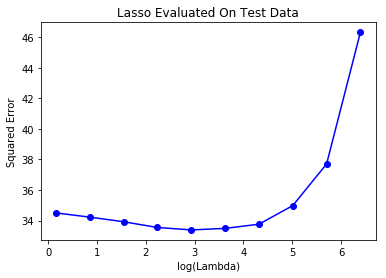

In [3]:
plt.plot(log_lambdas, squared_errors, 'bo-')
plt.title('Lasso Evaluated On Test Data')
plt.xlabel('log(Lambda)')
plt.ylabel('Squared Error')
plt.savefig('../plots/log-lambda-vs-squared-error-test.png')
plt.show()